# nanoporeRunQC_quickRunner.ipynb
## Marcus Viscardi,    July 27, 2023

I want to generally just have this script run stuff from nanoporePipelineCommon.py, this is a notebook so I can test these a little easier!

In [1]:
import nanoporePipelineCommon as npC

import seaborn as sea
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from Bio import SeqIO
import pysam

import pandas as pd
pd.set_option('display.width', 200)
pd.set_option('display.max_columns', None)

get_dt = npC.get_dt
print(f"Imports done at {get_dt(for_print=True)}")

Imports done at 07/28/23 @ 04:12:24 PM


In [2]:
obj_dict = {}
for lib in [
    "oldN2",
    # "oldS6",
    "newerN2",
    "newerS6",
    "newerS5",
]:
    print(f"\nLoading {lib}...", end="")
    obj_dict[lib] = npC.NanoporeRun(run_nickname=lib)
    print(" Done!")


Loading oldN2... Done!

Loading newerN2... Done!

Loading newerS6... Done!

Loading newerS5... Done!


In [3]:
spacing = 20

print_list = []
comma_print_list = []
for i, (lib, obj) in enumerate(obj_dict.items()):
    cdict = obj.get_read_counts_dict()
    if cdict['protein_coding'] <= 0:
        print(f"Getting read biotype counts for {lib}...")
        obj.get_read_biotype_count_dict()
    if cdict['adapted'] <= 0:
        print(f"Getting raw adapted counts for {lib}...")
        obj.get_raw_adapted_count()
    cdict = obj.get_read_counts_dict()
    string_list = [f"{lib:<{spacing-5}}"]
    comma_string_list = [f"{lib},"]
    key_string_list = [f"{'Library':<{spacing-5}}"]
    key_comma_string_list = [f"{'Library'},"]
    for key, value in cdict.items():
        string_list.append(f"{value:>{spacing},}")
        comma_string_list.append(f"{value},")
        key_string_list.append(f"{key.replace('_', ' ').title():>{spacing}}")
        key_comma_string_list.append(f"{key.replace('_', ' ').title()},")
    if i == 0:
        print_list.append(key_string_list)
        comma_print_list.append(key_comma_string_list)
    print_list.append(string_list)
    comma_print_list.append(comma_string_list)
print("\n".join(["".join(line) for line in print_list]))
# print("\n".join(["".join(line) for line in comma_print_list]))  # use this for pasting to google sheets

Getting read biotype counts for oldN2...
Getting raw adapted counts for oldN2...
Getting read biotype counts for newerN2...
Getting raw adapted counts for newerN2...
Getting read biotype counts for newerS6...
Getting raw adapted counts for newerS6...
Getting read biotype counts for newerS5...
Getting raw adapted counts for newerS5...
Library                  Basecalled             Aligned     Primary Aligned         Tail Called       Gene Assigned Transcript Assigned      Protein Coding             Adapted
oldN2                     1,390,361             808,100             721,848             537,666             585,802             538,150             567,110              48,500
newerN2                   1,189,279           1,137,004           1,067,822             645,575             509,120             447,159             494,721              23,316
newerS6                   1,402,040           1,321,575           1,244,831             689,288             760,888             657,150 

newerN2


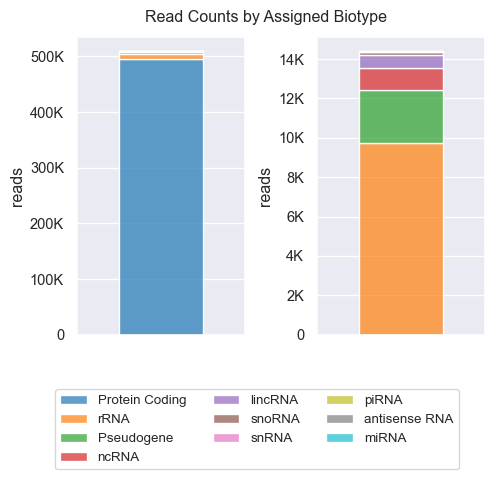

newerS6


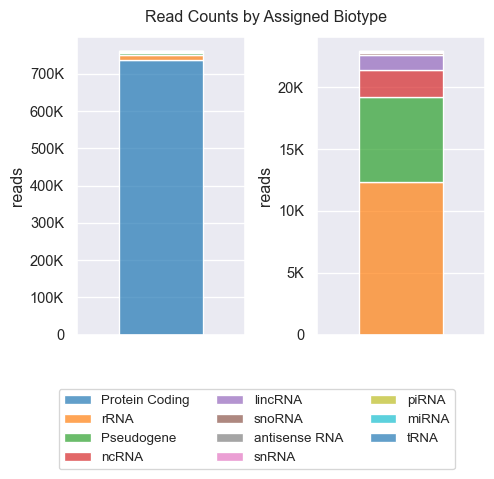

newerS5


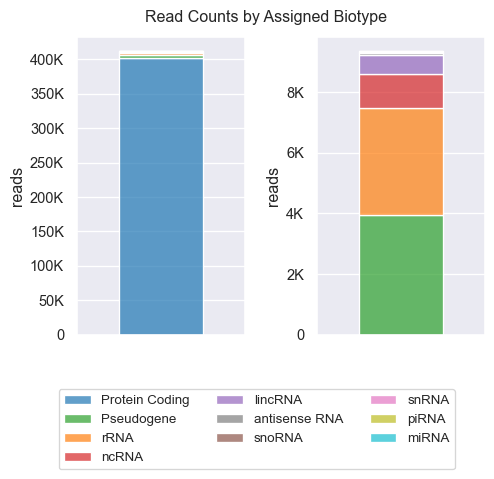

oldN2


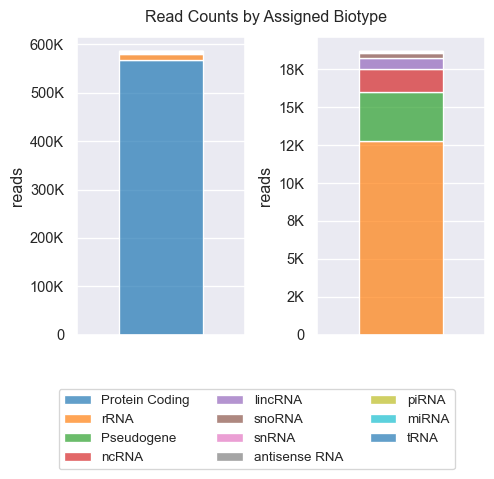

done.


In [8]:
sea.set_style('whitegrid')

for i, lib in enumerate(['newerN2', 'newerS6', 'newerS5', 'oldN2']):
    obj = obj_dict[lib]
    print(lib)
    obj.biotypes_bar_plot()
print("done.")